# Breast Cancer

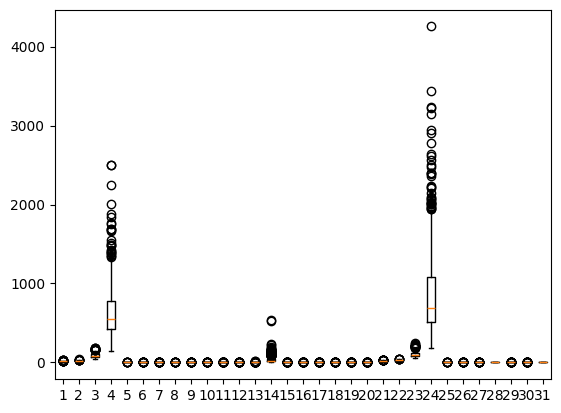

In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from matplotlib import pyplot as plt

dataset = load_breast_cancer()
data = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
data['target'] = pd.Series(dataset.target)

plt.boxplot(data)
plt.show()

In [3]:
data.target.value_counts()

target
1    357
0    212
Name: count, dtype: int64

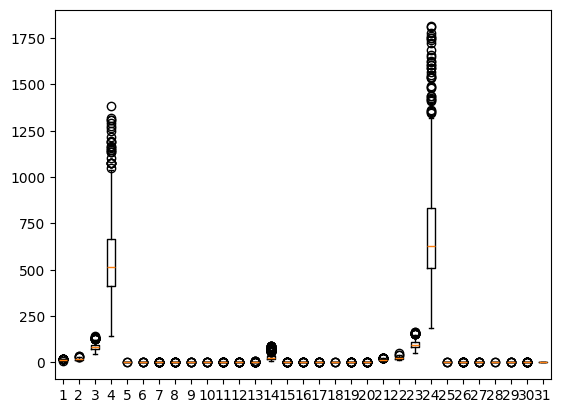

In [4]:
# Remove outliers
for column in data.columns:
    if column != 'target':
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3-q1
        lLim = q1 - 2.5 * iqr
        hLim = q3 + 2.5 * iqr
        data = data[(data[column] >= lLim) & (data[column] <= hLim)]

# Plot boxplot without verbose
plt.boxplot(data)
plt.show()

In [5]:
data.target.value_counts()

target
1    326
0    117
Name: count, dtype: int64

Obs.: A nova quantidade da classe 0 diminui muito com a remoção dos outliers, o que indica que não é uma boa ideia realizar essa remoção

In [6]:
target = data['target']
data = data.drop(columns='target')

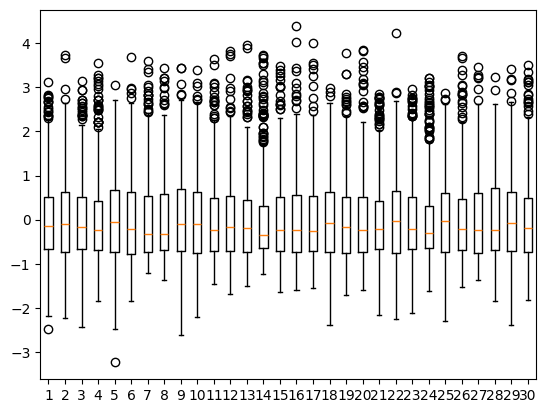

In [7]:
# Normalização standart scallar
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(data)

plt.boxplot(data)
plt.show()

In [45]:
compare = {'model': [], 'accuracy': []}

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier()
gridSearch = GridSearchCV(model, param_grid={'max_depth': range(1, 4)}, cv=10)
skfold = StratifiedKFold(n_splits=10)
res = cross_val_score(gridSearch, data, target, cv=skfold, scoring='accuracy')

compare['model'].append('DecisionTree')
compare['accuracy'].append(res.mean())

In [54]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
gridSearch = GridSearchCV(model, param_grid={'max_depth': range(1, 4), 'n_estimators': range(20, 40)}, cv=10)
skfold = StratifiedKFold(n_splits=10)
res = cross_val_score(gridSearch, data, target, cv=skfold, scoring='accuracy')

compare['model'].append('RandomForest')
compare['accuracy'].append(res.mean())

In [55]:
# Extra trees
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
gridSearch = GridSearchCV(model, param_grid={'max_depth': range(1, 4), 'n_estimators': range(20, 40)}, cv=10)
skfold = StratifiedKFold(n_splits=10)
res = cross_val_score(gridSearch, data, target, cv=skfold, scoring='accuracy')

compare['model'].append('ExtraTrees')
compare['accuracy'].append(res.mean())

In [56]:
compare = pd.DataFrame(compare, columns=['model', 'accuracy'])
compare.head()

,model,accuracy
0,DecisionTree,0.936818
1,RandomForest,0.959545
2,DecisionTree,0.921010
3,RandomForest,0.934747
4,ExtraTrees,0.927929


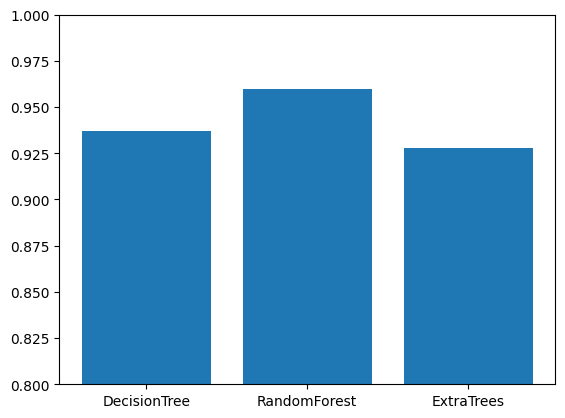

In [57]:
# Bar plot of accuracy
plt.bar(compare.model, compare.accuracy)
plt.ylim(0.8, 1.0)
plt.show()